In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Lectura de datos: clientes y movimientos a otros bancos

In [ ]:
data = pd.read_csv(
    "/gdrive/MyDrive/2. Modelo de Inversiones/datos/MOVIMIENTOS_DIARIOS/BASES_FILTRADAS/MOVCA_TRANSF_OTROSBCOS_2.csv",
    sep=";",
    encoding="latin-1",
)
clientes = pd.read_csv(
    "/gdrive/MyDrive/2. Modelo de Inversiones/datos/MOVIMIENTOS_DIARIOS/BASES_FILTRADAS/CLIENTES_TRANSF_OTROS_BCOS_2.csv",
    sep=";",
    encoding="latin-1",
)

In [ ]:
clientes.head()

,ID_Cliente_BP,SEGMENTO,ClasificacionCliente,AÑOS_ANTIG,FECHA_TRANSACCION,ID_Motivo_Transferencia,Desc_Tipo_Transaccion,Desc_Banco_Destino,ID_Moneda,Mnt_Importe,CUIT_Destino,CUIT_Origen
0,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2020-11-13,VAR,transfers.other.send,BANCO DE GALICIA,1,500.0,20050700500,20050700500
1,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-25,VAR,transfers.other.send,BBVA FRANCES,1,20600.0,20050700500,20050700500
2,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-01-19,VAR,transfers.other.send,BBVA FRANCES,1,20600.0,20050700500,20050700500
3,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2020-12-12,VAR,transfers.other.send,BBVA FRANCES,1,20160.0,20050700500,20050700500
4,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2020-11-13,EXP,transfers.other.send,BBVA FRANCES,1,20160.0,20050700500,20050700500


In [ ]:
data["FECHA"] = pd.to_datetime(data["FECHA"], format="%Y-%m-%d")

In [ ]:
data.head()

,ID_Cliente_BP,SEGMENTO,ClasificacionCliente,AÑOS_ANTIG,FECHA,CATEGORIA,IMPORTE,SALDO_INICIAL
0,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2020-11-01,OTROS CREDITOS,5.02,15988.35
1,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-25,TRANSFERENCIA ENVIADA,-20600.00,NaN
2,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-22,ACREDITACION ANSES OTROS,25983.62,NaN
3,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-19,EXTRACCION,-30000.00,NaN
4,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-18,PAGO SERVICIOS,-39050.00,NaN


In [ ]:
data.head(10)

,ID_Cliente_BP,SEGMENTO,ClasificacionCliente,AÑOS_ANTIG,FECHA,CATEGORIA,IMPORTE,SALDO_INICIAL
0,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2020-11-01,OTROS CREDITOS,5.02,15988.35
1,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-25,TRANSFERENCIA ENVIADA,-20600.00,NaN
2,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-22,ACREDITACION ANSES OTROS,25983.62,NaN
3,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-19,EXTRACCION,-30000.00,NaN
4,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-18,PAGO SERVICIOS,-39050.00,NaN
5,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-08,PAGO RESUMEN,-76596.61,NaN
6,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-08,TRANSFERENCIA ENVIADA,-3093.00,NaN
7,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-05,PAGO RESUMEN,-44510.00,NaN
8,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-05,ACREDITACION DE HABERES,194852.66,NaN
9,35,Clientes Cuenta Sueldo,BI - 02 - SUELDO ADM PUBL M4,12,2021-02-01,OTROS CREDITOS,5.66,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167324 entries, 0 to 1167323
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID_Cliente_BP         1167324 non-null  int64         
 1   SEGMENTO              1167324 non-null  object        
 2   ClasificacionCliente  1167324 non-null  object        
 3   AÑOS_ANTIG            1167324 non-null  int64         
 4   FECHA                 1167324 non-null  datetime64[ns]
 5   CATEGORIA             1167324 non-null  object        
 6   IMPORTE               1167324 non-null  float64       
 7   SALDO_INICIAL         14991 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 71.2+ MB


In [ ]:
data.describe()

,ID_Cliente_BP,CANTIDAD_PRODUCTOS,GRUPO_ANTIGUEDAD,SPROM>1000,IMPORTE,SALDO_INICIAL
count,2.684140e+06,2.684140e+06,2.684140e+06,2684140.0,2.684140e+06,4.881300e+04
mean,9.123952e+05,2.548945e+00,2.614706e+00,1.0,4.615547e+02,6.360901e+04
std,7.086423e+05,1.429856e+00,6.640619e-01,0.0,5.017551e+04,1.815949e+05
min,3.500000e+01,1.000000e+00,0.000000e+00,1.0,-1.430000e+07,0.000000e+00
25%,3.499990e+05,1.000000e+00,2.000000e+00,1.0,-5.211000e+03,6.116500e+02
50%,6.502910e+05,2.000000e+00,3.000000e+00,1.0,-1.337925e+03,1.354357e+04
75%,1.417809e+06,4.000000e+00,3.000000e+00,1.0,2.850000e+00,5.282625e+04
max,2.735883e+06,5.000000e+00,3.000000e+00,1.0,1.440427e+07,6.209418e+06


In [ ]:
data.SEGMENTO.unique()

array(['Clientes Cuenta Sueldo'], dtype=object)

In [ ]:
data["ID_Cliente_BP"].nunique()

50000

In [ ]:
data['SALDO_INICIAL'].isna().sum()

2635327

In [ ]:
data['SALDO_INICIAL'].shape[0]

2684140

In [ ]:
data['SALDO_INICIAL'].shape[0] - data['SALDO_INICIAL'].isna().sum()

48813

In [ ]:
data.rename(columns = {'SALDO_INICIAL':'SALDO_CA'}, inplace = True)

In [ ]:
data.columns

Index(['ID_Cliente_BP', 'SEGMENTO', 'ClasificacionCliente',
       'CANTIDAD_PRODUCTOS', 'GRUPO_ANTIGUEDAD', 'SPROM>1000', 'FECHA',
       'CATEGORIA', 'IMPORTE', 'SALDO_CA'],
      dtype='object')

In [ ]:
data['SALDO_CA'].fillna(0, inplace=True)

KeyError: ignored

In [ ]:
data['SALDO_CA'] = data['SALDO_CA'] + data['IMPORTE']

In [ ]:
data = data.groupby(['ID_Cliente_BP', 'FECHA'])['SALDO_CA'].sum().reset_index()

In [ ]:
data.head()

,ID_Cliente_BP,FECHA,SALDO_CA
0,35,2020-11-01,15993.37
1,35,2020-11-02,-554.18
2,35,2020-11-09,58000.31
3,35,2020-11-11,-2000.00
4,35,2020-11-13,-24187.00


In [ ]:
data = data[['FECHA','ID_Cliente_BP', 'SALDO_CA']]

In [ ]:
data.isna().sum()

FECHA            0
ID_Cliente_BP    0
SALDO_CA         0
dtype: int64

### Acomodamos para tener una columna por cliente

In [ ]:
data = pd.pivot(data, index="FECHA", values="SALDO_CA", columns="ID_Cliente_BP")


KeyError: ignored

In [ ]:
data.fillna(0, inplace=True)
data = data.cumsum()
data = data.loc[:, data.isna().sum() == 0]
data = data.loc[:, data.max() > 0]
data = data.loc[:, data.min() >= 0]
print(data.shape)

(76, 49211)


In [ ]:
data.index.unique()

DatetimeIndex(['2020-11-01', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19', '2020-11-20', '2020-11-24',
               '2020-11-25', '2020-11-26', '2020-11-27', '2020-11-30',
               '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
               '2020-12-09', '2020-12-10', '2020-12-11', '2020-12-14',
               '2020-12-15', '2020-12-16', '2020-12-17', '2020-12-18',
               '2020-12-21', '2020-12-22', '2020-12-23', '2020-12-28',
               '2020-12-29', '2020-12-30', '2021-01-01', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-18', '2021-01-19', '2021-01-20',
               '2021-01-21', '2021-01-22', '2021-01-25', '2021-01-26',
      

In [ ]:
data

NameError: ignored

In [ ]:
# Podemos buscar personas que hayan tenido un influx de dinero grande en los últimos meses y que no hayan tenido una salida muy grande (diaria).
def accounts_with_influx_little_outflux(th_influx, th_outflux):
    inf_filter = (data - data.shift(1)).max() > th_influx
    out_filter = (data - data.shift(1)).min() > -th_outflux

    return data.loc[:, inf_filter & out_filter].columns

inf_out_cols = accounts_with_influx_little_outflux(40000, 20000)

In [ ]:
data[inf_out_cols].shape

(76, 0)

In [ ]:
data[inf_out_cols].iloc[:, :15].plot(figsize=(16,9))

TypeError: ignored

### Normalicemos dividiendo por el máximo


In [ ]:
normalized = data / data.max()

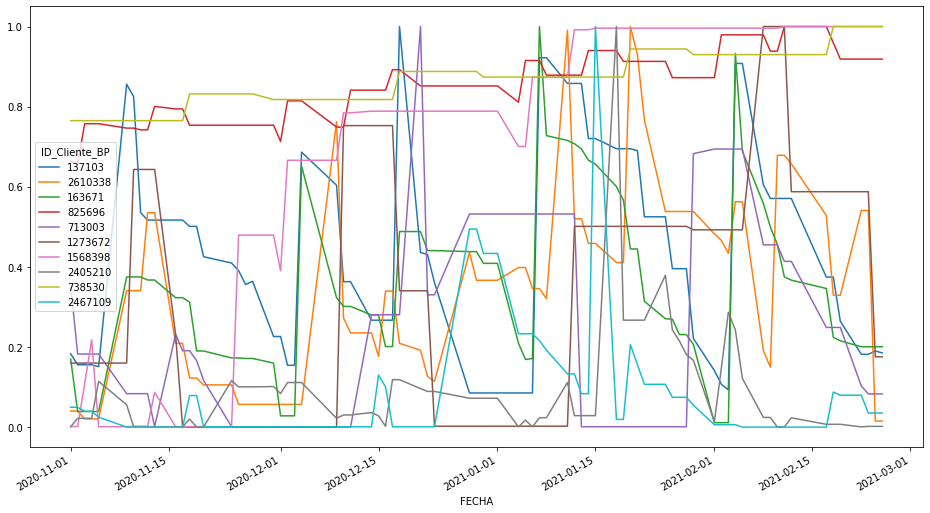

In [ ]:
normalized.sample(n=10, axis=1).plot(figsize=(16,9))

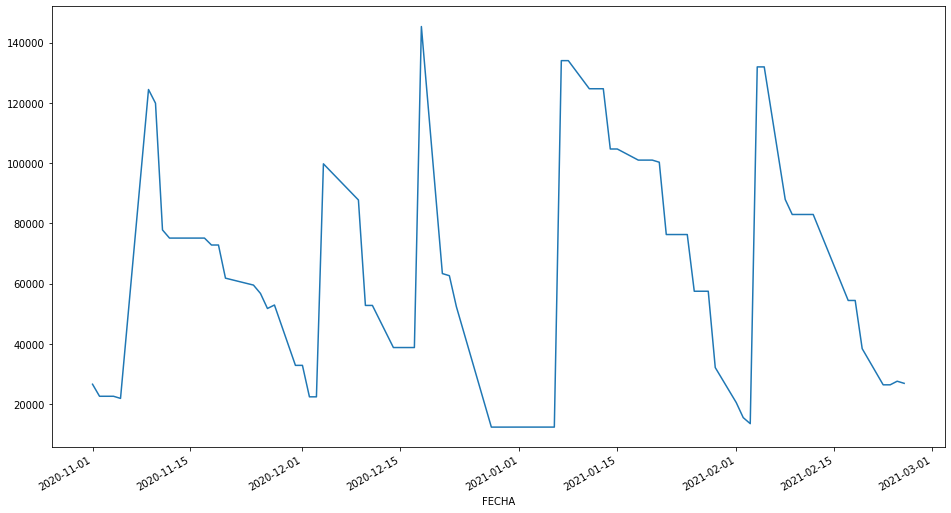

In [ ]:
# Ejemplo de cliente que frecuentemente llena y vacía la cuenta.
data[137103].plot(figsize=(16,9))

### Comencemos a aplicar K-Means para agrupar las series de tiempo de los valores de caja

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
model = KMeans(n_clusters=4)
model.fit(normalized.T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
from collections import Counter, defaultdict
count = Counter(model.labels_)
keys = list(count.keys())
print(count)
print(sum(Counter(model.labels_)))
print(normalized.shape)
count = dict(sorted(count.items(), key=lambda pair: pair[1], reverse=True))
print(count)

Counter({3: 13463, 2: 12920, 0: 12409, 1: 10419})
6
(76, 49211)
{3: 13463, 2: 12920, 0: 12409, 1: 10419}


In [ ]:
colors = ["lightblue", "orange", "green", "red", "purple"]
keys = list(count.keys())

Text(0, 0.5, 'Saldo Diario (porcentual relativo al máximo)')

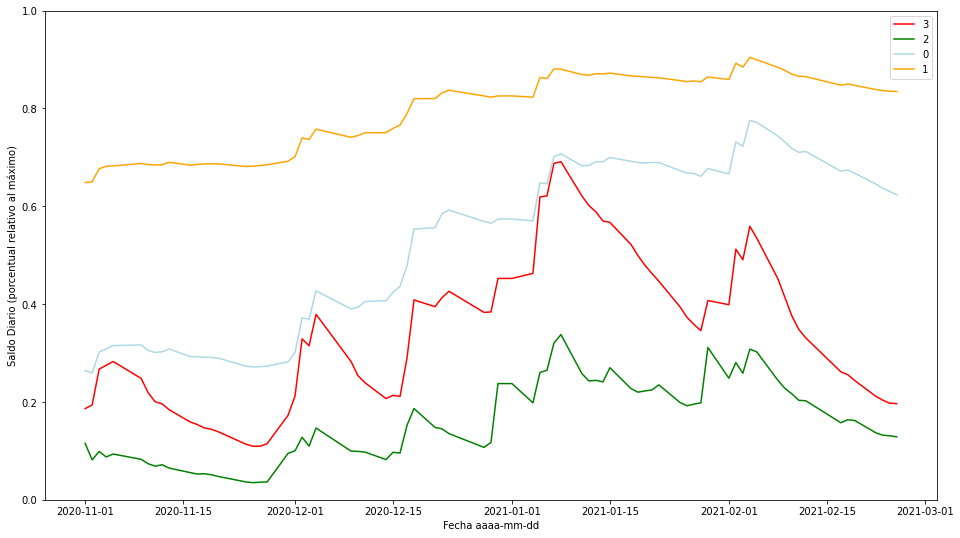

In [ ]:
plt.figure(figsize=(16,9))
counter = 0
for idx in keys:
  plt.plot(data.index, model.cluster_centers_[idx], label=str(idx), c=colors[idx])
  counter += 1

plt.ylim([0, 1])
plt.legend(loc="upper right")
plt.xlabel("Fecha aaaa-mm-dd")
plt.ylabel("Saldo Diario (porcentual relativo al máximo)")
# plt.savefig("/gdrive/MyDrive/Invera/B2B/Bancor/Bancor ML/2. Modelo de Inversiones/datos/5clusters.png")

Text(0.5, 1.0, 'Cantidad de Clientes por Perfil')

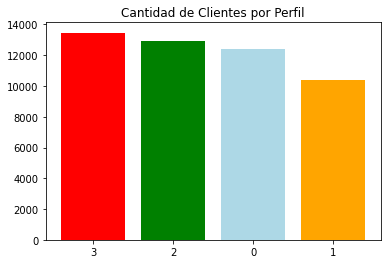

In [ ]:
plt.bar(height=count.values(), x=[str(i) for i in keys], color=[colors[i] for i in keys])
plt.title("Cantidad de Clientes por Perfil")
# plt.savefig("/gdrive/MyDrive/Invera/B2B/Bancor/Bancor ML/2. Modelo de Inversiones/datos/bar5clusters.png")

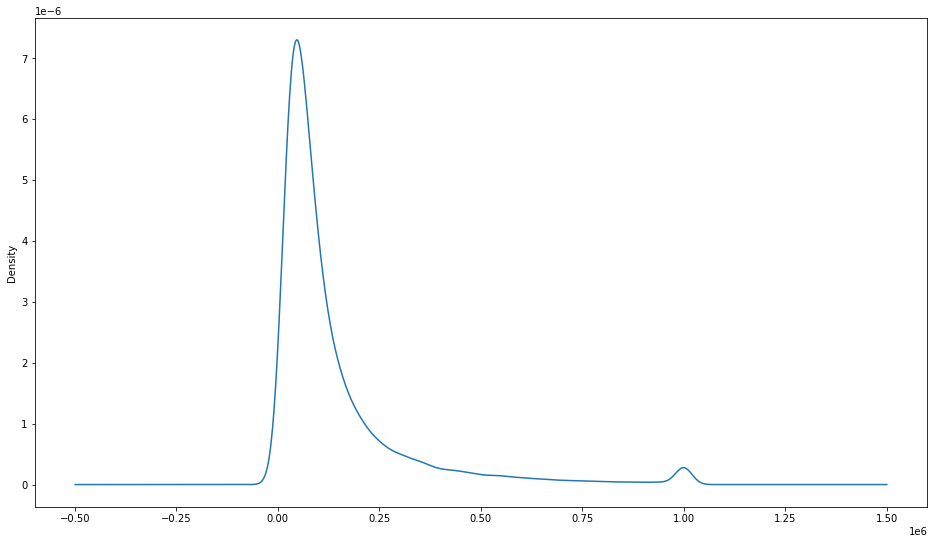

In [ ]:
(data.max().clip(upper=1000000)).plot.kde(figsize=(16,9))

## Estudio de cuentas por Perfil

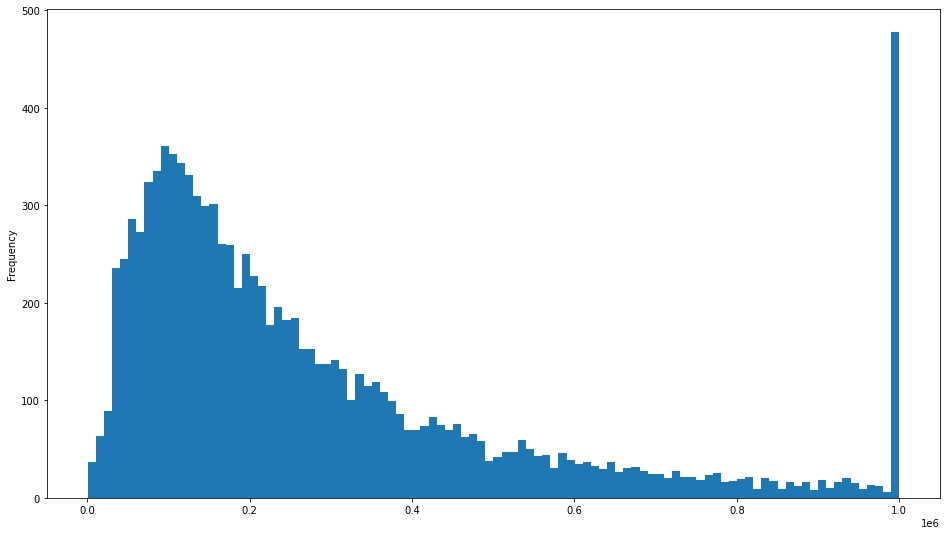

In [ ]:
data.iloc[:, model.labels_ == 1].clip(upper=1000000).max().plot.hist(figsize=(16,9), bins=100)

In [ ]:
data.shape

(76, 49211)

In [ ]:
pd.set_option('float_format', '{:.2f}'.format)
for idx in range(len(keys)):
  print(f"--------- Perfil {idx} ---------")
  print(f"Descripción de Saldos Máximos")
  print(data.iloc[:, model.labels_ == idx].max().describe(percentiles=[.25, .5, .75, .85, .90, .95, .99]))
  print(f"Descripción de Saldos Medios")
  print(data.iloc[:, model.labels_ == idx].mean().describe(percentiles=[.25, .5, .75, .85, .90, .95, .99]))
  print(f"Descripción de Saldos Mínimos")
  print(data.iloc[:, model.labels_ == idx].min().describe(percentiles=[.25, .5, .75, .85, .90, .95, .99]))
  print()
  print("=====================================================================")
  print()

--------- Perfil 0 ---------
Descripción de Saldos Máximos
count     12409.00
mean     122859.20
std      159563.41
min        1200.01
25%       48066.36
50%       83548.49
75%      145333.51
85%      194115.15
90%      241302.28
95%      340736.81
99%      685832.70
max     7319134.72
dtype: float64
Descripción de Saldos Medios
count     12409.00
mean      65822.51
std       83989.83
min         510.55
25%       24759.81
50%       44114.78
75%       77611.73
85%      105888.81
90%      132746.02
95%      184893.76
99%      389686.93
max     3369304.07
dtype: float64
Descripción de Saldos Mínimos
count    12409.00
mean     16263.28
std      31541.90
min          0.00
25%        420.10
50%       5473.92
75%      19250.94
85%      31266.70
90%      43062.88
95%      65143.99
99%     138939.33
max     649755.88
dtype: float64


--------- Perfil 1 ---------
Descripción de Saldos Máximos
count     10419.00
mean     319871.63
std      403423.00
min         726.07
25%      110715.74
50%      

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


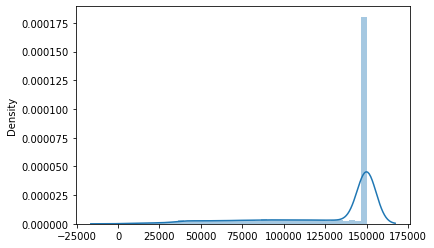

In [ ]:
import numpy as np
import seaborn as sns
sns.distplot(data.iloc[:, model.labels_ == 1].max().clip(upper=150000))

In [ ]:
cluster_0 = data.columns[model.labels_ == 0]
cluster_1 = data.columns[model.labels_ == 1]
cluster_2 = data.columns[model.labels_ == 2]
cluster_3 = data.columns[model.labels_ == 3]

In [ ]:
len(cluster_1)

10419

In [ ]:
pd.DataFrame(cluster_3).to_csv("/gdrive/MyDrive/Invera/B2B/Bancor/Bancor ML/2. Modelo de Inversiones/datos/cluster_saltos_filtrados.csv")

In [ ]:
transf = pd.read_csv(
    "/gdrive/MyDrive/Invera/B2B/Bancor/Bancor ML/2. Modelo de Inversiones/datos/MOVIMIENTOS_DIARIOS/MOVIMIENTOS_CA_CTES_SINTENENCIA.csv",
    sep=";",
)
transf.head()

,ID_Cliente_BP,FECHA,CATEGORIA,IMPORTE,SALDO_INICIAL
0,426,2020-11-01,OTROS CREDITOS,1.05,6057.88
1,426,2020-11-02,TRANSFERENCIA ENVIADA,-1370.00,nan
2,426,2020-11-09,COMPRA,-1000.00,nan
3,426,2020-11-19,ACREDITACION ANSES OTROS,17833.52,nan
4,426,2020-11-30,TRANSFERENCIA ENVIADA,-16620.00,nan


In [ ]:
transf["CATEGORIA"].unique()

array(['OTROS CREDITOS', 'TRANSFERENCIA ENVIADA', 'COMPRA',
       'ACREDITACION ANSES OTROS', 'PAGO RESUMEN', 'DEPOSITO',
       'TRANSFERENCIA RECIBIDA', 'OPERACION CAMBIO DEB', 'IMPUESTO PAIS',
       'GANANCIAS COMPRA EXTRANJERO', 'PAGO SERVICIOS', 'EXTRACCION',
       'ACREDITACION DE HABERES', 'OTROS DEBITOS',
       'DEBITO AUTOMATICO SERVICIO', 'PAGO CUOTA PRESTAMO',
       'MUNDO BANCOR', 'CANCELACION ADELANTO HABERES', 'CREDITO PRESTAMO',
       'SUSCRIPCION FCI', 'RESCATE FCI', 'DEBITO PLAZO FIJO',
       'CREDITO PLAZO FIJO', 'HONORARIOS', 'OPERACION CAMBIO CRED',
       'ACREDITACION SEGURO DESEMPLEO', 'COMISION MERCAP',
       'DEBITO MERCAP'], dtype=object)

In [ ]:
cats_haberes = [
  #"ACREDITACION DE HABERES", "HONORARIOS", "ACREDITACION ANSES OTROS", "ACREDITACION SEGURO DESEMPLEO"
  #"ACREDITACION ANSES OTROS", #"ACREDITACION SEGURO DESEMPLEO"
  "ACREDITACION DE HABERES", "HONORARIOS", "ACREDITACION SEGURO DESEMPLEO"
]

for idx in keys:
  clust = normalized.columns[model.labels_ == idx]
  transf_clust = transf.loc[transf["ID_Cliente_BP"].isin(clust)]
  print("Clientes que reciben acreditaciones en Bancor: ")
  print(transf_clust.loc[transf["CATEGORIA"].isin(cats_haberes), "ID_Cliente_BP"].nunique())
  print(f"Clientes en el cluster {idx}: {len(clust)}")
  print(f"Mediana de haberes recibidos mensualmente en el cluster {idx}: {transf_clust.loc[transf['CATEGORIA'].isin(cats_haberes)].groupby('ID_Cliente_BP').sum('IMPORTE').median() / 4}")
  print(f"STD de haberes recibidos mensualmente en el cluster {idx}: {transf_clust.loc[transf['CATEGORIA'].isin(cats_haberes)].groupby('ID_Cliente_BP').sum('IMPORTE').std() / 4}")

  print("_______________________________________________")

Clientes que reciben acreditaciones en Bancor: 
1005
Clientes en el cluster 1: 3971
Mediana de haberes recibidos mensualmente en el cluster 1: IMPORTE         42746.60
SALDO_INICIAL       0.00
dtype: float64
STD de haberes recibidos mensualmente en el cluster 1: IMPORTE         76170.85
SALDO_INICIAL       0.00
dtype: float64
_______________________________________________
Clientes que reciben acreditaciones en Bancor: 
827
Clientes en el cluster 2: 1771
Mediana de haberes recibidos mensualmente en el cluster 2: IMPORTE         51267.27
SALDO_INICIAL       0.00
dtype: float64
STD de haberes recibidos mensualmente en el cluster 2: IMPORTE         31519.59
SALDO_INICIAL       0.00
dtype: float64
_______________________________________________
Clientes que reciben acreditaciones en Bancor: 
96
Clientes en el cluster 0: 1520
Mediana de haberes recibidos mensualmente en el cluster 0: IMPORTE         49533.51
SALDO_INICIAL       0.00
dtype: float64
STD de haberes recibidos mensualmente en el

In [ ]:
cats_debitos = [
  'DEBITO AUTOMATICO SERVICIO', 'PAGO SERVICIOS', 'PAGO RESUMEN',
]

for idx in keys:
  clust = normalized.columns[model.labels_ == idx]
  transf_clust = transf.loc[transf["ID_Cliente_BP"].isin(clust)]
  print("Clientes que pagan de manera recurrente con Bancor: ")
  print(transf_clust.loc[transf["CATEGORIA"].isin(cats_debitos), "ID_Cliente_BP"].nunique())
  print(f"Media de debito en 4 meses en el cluster {idx}: {transf_clust.loc[transf['CATEGORIA'].isin(cats_debitos)].groupby('ID_Cliente_BP').sum('IMPORTE').mean()}")
  print(f"Clientes en el cluster {idx}: {len(clust)}")
  print("____________________________________________________")

Clientes que pagan de manera recurrente con Bancor: 
1304
Media de debito en 4 meses en el cluster 1: IMPORTE         -54144.37
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 1: 3971
____________________________________________________
Clientes que pagan de manera recurrente con Bancor: 
942
Media de debito en 4 meses en el cluster 2: IMPORTE         -68420.97
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 2: 1771
____________________________________________________
Clientes que pagan de manera recurrente con Bancor: 
69
Media de debito en 4 meses en el cluster 0: IMPORTE         -33247.90
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 0: 1520
____________________________________________________
Clientes que pagan de manera recurrente con Bancor: 
459
Media de debito en 4 meses en el cluster 4: IMPORTE         -61339.13
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 4: 963
______________________________________________

In [ ]:
cats_gastos = [
  'IMPUESTO PAIS', 'OPERACION CAMBIO DEB', 'GANANCIAS COMPRA EXTRANJERO',
]

for idx in keys:
  clust = normalized.columns[model.labels_ == idx]
  transf_clust = transf.loc[transf["ID_Cliente_BP"].isin(clust)]
  print("Clientes que pagan con moneda extranjera con Bancor: ")
  print(transf_clust.loc[transf["CATEGORIA"].isin(cats_gastos), "ID_Cliente_BP"].nunique())
  print(f"Media de gastos dólar en 4 meses en el cluster {idx}: {transf_clust.loc[transf['CATEGORIA'].isin(cats_gastos)].groupby('ID_Cliente_BP').sum('IMPORTE').mean()}")
  print(f"Clientes en el cluster {idx}: {len(clust)}")
  print("____________________________________________________")

Clientes que pagan con moneda extranjera con Bancor: 
62
Media de gastos dólar en 4 meses en el cluster 1: IMPORTE         -35557.91
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 1: 3971
____________________________________________________
Clientes que pagan con moneda extranjera con Bancor: 
96
Media de gastos dólar en 4 meses en el cluster 2: IMPORTE         -40012.74
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 2: 1771
____________________________________________________
Clientes que pagan con moneda extranjera con Bancor: 
3
Media de gastos dólar en 4 meses en el cluster 0: IMPORTE         -9538.91
SALDO_INICIAL       0.00
dtype: float64
Clientes en el cluster 0: 1520
____________________________________________________
Clientes que pagan con moneda extranjera con Bancor: 
44
Media de gastos dólar en 4 meses en el cluster 4: IMPORTE         -33109.09
SALDO_INICIAL        0.00
dtype: float64
Clientes en el cluster 4: 963
_________________________

In [ ]:
transf[transf["ID_Cliente_BP"].isin(data.columns)]["ID_Cliente_BP"].nunique()

483

In [ ]:
client_transf = pd.read_csv(
    "/gdrive/MyDrive/Invera/B2B/Bancor/Bancor ML/2. Modelo de Inversiones/datos/MOVIMIENTOS_DIARIOS/BASES_FILTRADAS/MOVCA_NO_INVERSORES.csv",
    sep=";",
)

In [ ]:
for idx in keys:
  clust = normalized.columns[model.labels_ == idx]
  client_transf_clus = client_transf.loc[client_transf["ID_Cliente_BP"].isin(clust)]
  #print(len(client_transf_clus.loc[client_transf_clus["CUIT_Destino"] == client_transf_clus["CUIT_Origen"]].groupby("ID_Cliente_BP").sum("Mnt_Importe")))

In [ ]:
client_transf_clus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414551 entries, 40 to 2681775
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID_Cliente_BP         414551 non-null  int64  
 1   SEGMENTO              414551 non-null  object 
 2   ClasificacionCliente  414551 non-null  object 
 3   CANTIDAD_PRODUCTOS    414551 non-null  int64  
 4   GRUPO_ANTIGUEDAD      414551 non-null  int64  
 5   SPROM>1000            414551 non-null  int64  
 6   FECHA                 414551 non-null  object 
 7   CATEGORIA             414551 non-null  object 
 8   IMPORTE               414551 non-null  float64
 9   SALDO_INICIAL         10402 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 34.8+ MB


In [ ]:
 data_3 = data.loc[:, data.columns.isin(data.columns[model.labels_ == 3])]

In [ ]:
movimientos = data_3 - data_3.shift()
movimientos = movimientos / movimientos.max()

In [ ]:
movimientos.dropna().shape

(75, 13463)

In [ ]:
model_3 = KMeans(n_clusters=4)
model_3.fit(movimientos.dropna().T)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Counter(model_3.labels_)

Counter({0: 6339, 1: 1853, 2: 2255, 3: 3016})

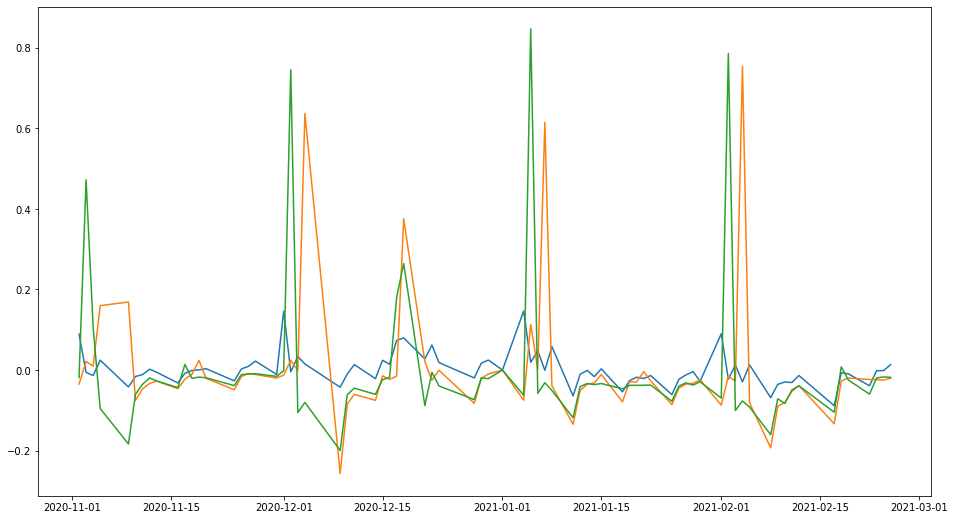

In [ ]:
plt.figure(figsize=(16, 9))
for idx in range(4):
  if idx != 1:
    plt.plot(movimientos.index[1:], model_3.cluster_centers_[idx])

In [ ]:
data[2727231].plot(figsize=(16,9))

KeyError: ignored